In [ ]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew


In [ ]:
df=pd.read_csv("INNHotelsGroup.csv")    #read Data

In [ ]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
df['y']=df['booking_status'].replace({'Not_Canceled':0, 'Canceled':1})      #Mapping Non-canceled with 0 and canceled by 1

In [ ]:
dff=df
df1=df

checking for duplicates value

In [ ]:
dff.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status', 'y'],
      dtype='object')

In [ ]:
print(df.isnull().sum())                                 #Checking null values column wise

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
y                                       0
dtype: int64


In [ ]:
#############################

Exploratory Data Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


## BASED ON ABOVE TABLE WE CAN DRAW SOME CONCLUSIONS:



**1.   no_of _adults column indicates that on an averge there are 1.8 adult per booking. This suggest that most of the booking consist of 1 or 2 adults**

**2.  no_of_children column has 0.1 on an average booking that means majority of bookings do not include children**

**3. lead_time column indicates that  on  an average bookings are made approximately 85 days in advance. This suggests that many guests plan their stays well in advance.**

**4. required_car_parking_space column  that on average only a small percentage of bookings (around 3%) require a car parking space. This indicates that most guests may not require parking facilities or prefer alternative modes of transportation.**


In [ ]:


# Calculate the average room price
average_room_price = df['avg_price_per_room'].mean()
print("Average Room Price:", average_room_price)


Average Room Price: 103.42353907649897


**Average Room Price: 103.42353907649897**

## Average Price per room over time

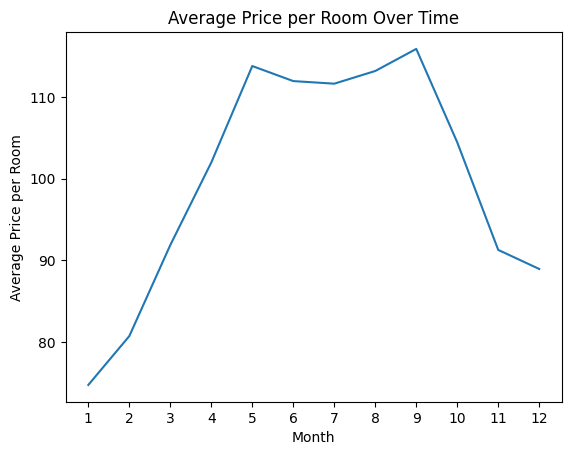

In [ ]:
# Line Plot: Average price per room over time
monthly_avg_price = df.groupby('arrival_month')['avg_price_per_room'].mean()
plt.plot(monthly_avg_price.index, monthly_avg_price.values)
plt.xlabel('Month')
plt.ylabel('Average Price per Room')
plt.title('Average Price per Room Over Time')
plt.xticks(range(1, 13))
plt.show()


**Line plot of Average price room per month shows that price linearly increase over month till may . Dip can be seen in july and aug .During  oct, Nov the price of room is linearly decreasing that shows that during this period cancelations might be happening**

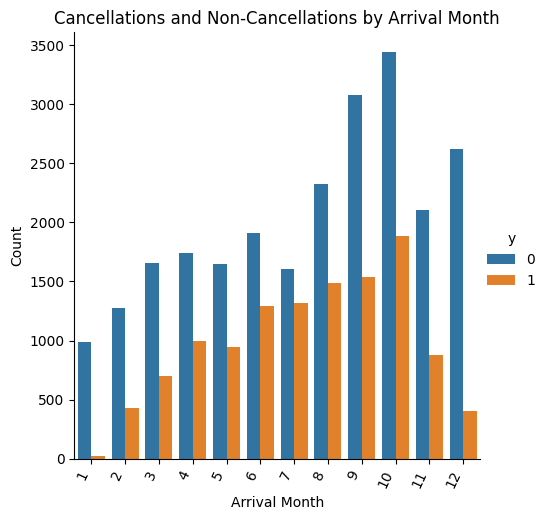

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'arrival_month' and 'y'

# Create a categorical plot
chart = sns.catplot(data=df, x='arrival_month', hue='y', kind='count')

# Set x-axis label rotation
chart.set_xticklabels(rotation=65, horizontalalignment='right')

# Set plot title and axis labels
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.title('Cancellations and Non-Cancellations by Arrival Month')

# Show the plot
plt.show()


**Maximum bookings occur in oct and mostly in the months of Aug , Sept , Oct, Dec**

## Compare the prices across different Market segments.

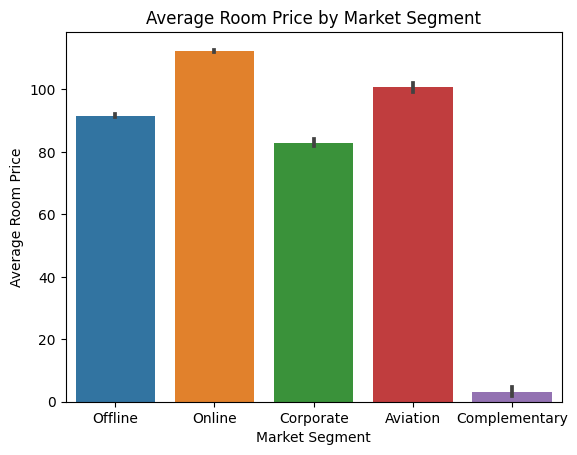

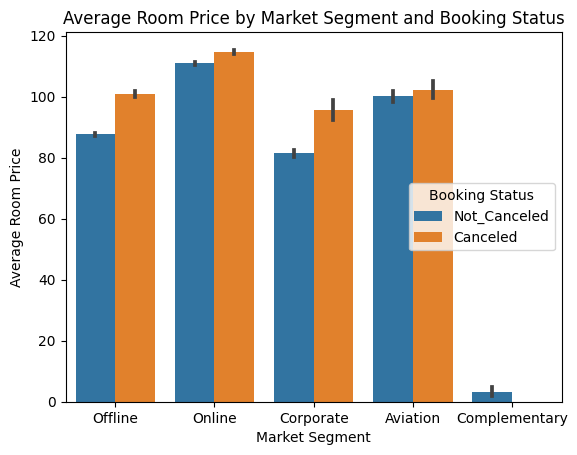

In [ ]:

# Example: Average room price by market segment
sns.barplot(x='market_segment_type', y='avg_price_per_room', data=df)
plt.xlabel('Market Segment')
plt.ylabel('Average Room Price')
plt.title('Average Room Price by Market Segment')
plt.show()



## Count of Market Segement

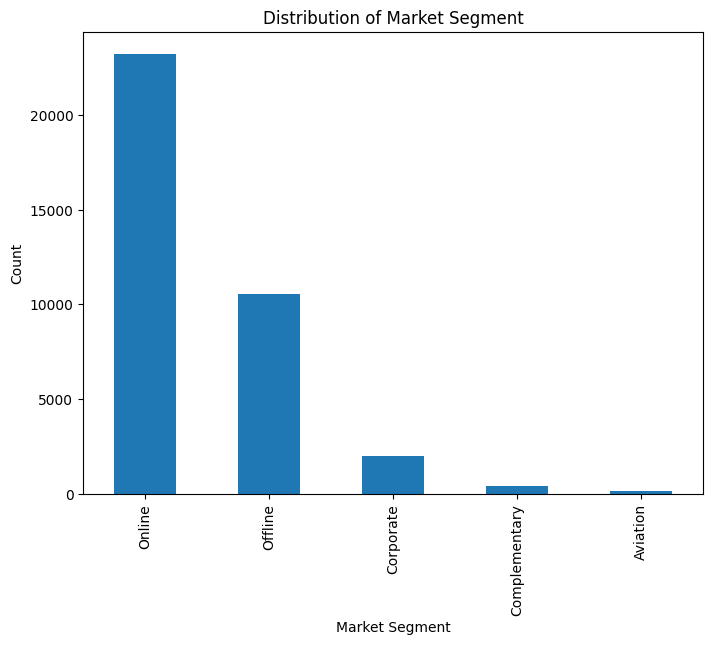

In [ ]:
# Bar Plot: Count of market_segment_type
plt.figure(figsize=(8, 6))
df['market_segment_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.show()


**The online market segement has highest count, then offline ,corporate, complimentary and aviation respectively**

##  Percentage Distribution of Market Segment

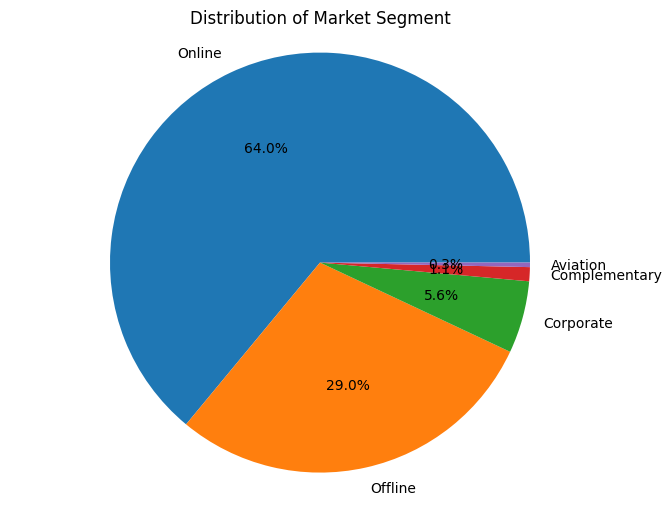

In [ ]:
plt.figure(figsize=(8, 6))
market_segment_counts = df['market_segment_type'].value_counts()

plt.pie(market_segment_counts, labels=market_segment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Market Segment')
plt.axis('equal')
plt.show()


**online market constitute- 64% .  offline constitute - 29% .    corporate- 5.6% . Complimentary - 1.1% . Aviation - 0.3%**

##  Proportion of booking_status

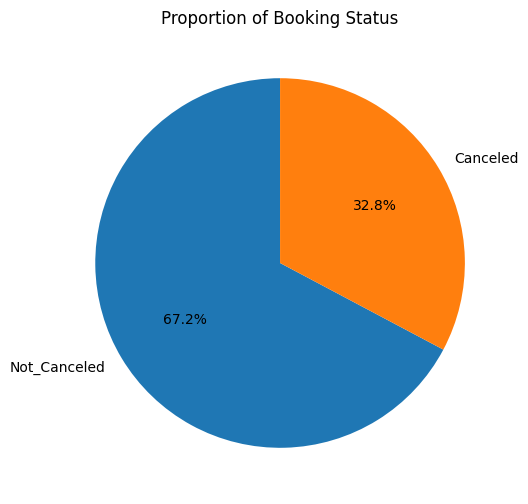

In [ ]:
booking_status_counts = df['booking_status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(booking_status_counts, labels=booking_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Booking Status')
plt.show()

**Out of total bookings , Canceled booking is 32.8 % and not canceled is 67.2%**

##**Percentage of Cancellation By market segement**

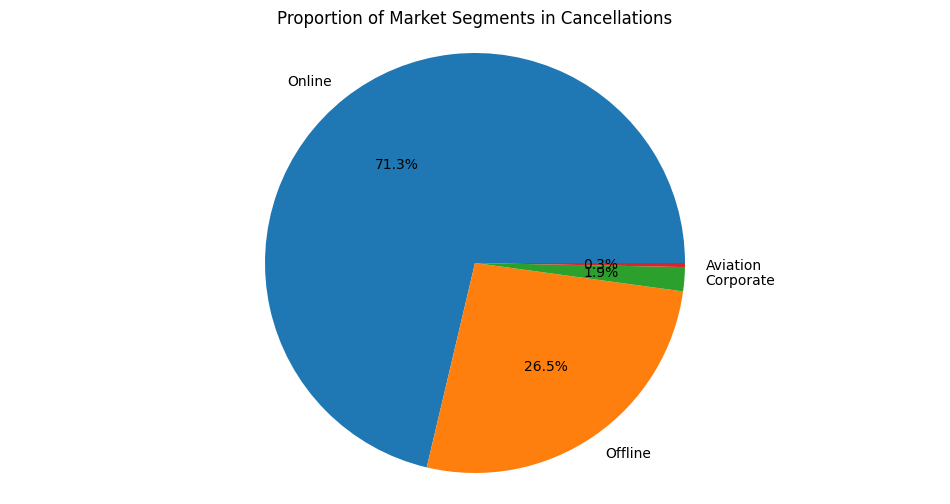

In [ ]:

# # Calculate the cancellation by market segment
# cancellation_counts = df[df['booking_status'] == 'Canceled']['market_segment_type'].value_counts()

# # Calculate the total counts for cancellations and not cancellations
# total_cancellations = cancellation_counts.sum()


# # Calculate the percentages for cancellations and not cancellations
# cancellation_percentages = cancellation_counts / total_cancellations * 100


# # Plot the pie charts
# plt.figure(figsize=(12, 6))

# # Pie chart for cancellations

# plt.pie(cancellation_percentages, labels=cancellation_percentages.index, autopct='%1.1f%%')
# plt.title('Proportion of Market Segments in Cancellations')
# plt.axis('equal')
# plt.show()


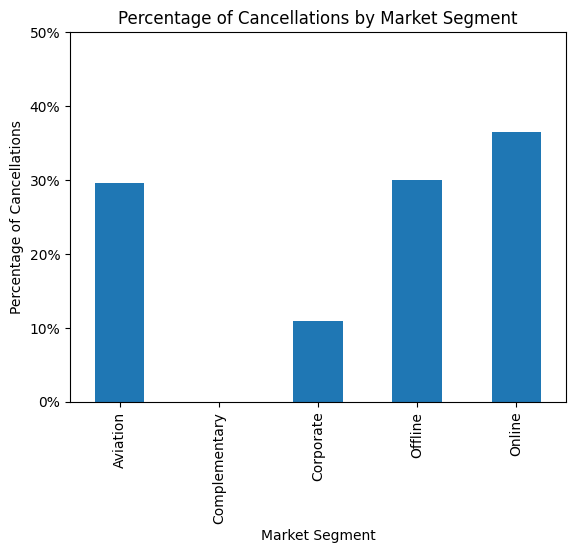

In [ ]:

booking_status_by_segment = pd.crosstab(df['market_segment_type'], df['booking_status'])
total_by_segment = booking_status_by_segment.sum(axis=1)
cancellation_percentage = (booking_status_by_segment['Canceled'] / total_by_segment) * 100

ax = cancellation_percentage.plot(kind='bar')
ax.set_yticks(range(0, 51, 10))  # Set y-axis ticks at intervals of 10
ax.set_yticklabels([f'{val}%' for val in range(0, 51, 10)])  # Format y-axis labels with percentage symbol

plt.xlabel('Market Segment')
plt.ylabel('Percentage of Cancellations')
plt.title('Percentage of Cancellations by Market Segment')
plt.show()


**The bar chart shows that percentage of cancellations by market segment. Out of 32.8 % cancelled booking status we have approx 40% online market segment, then offline and aviation has 30% and so on.**

## How cancellations affected by lead time

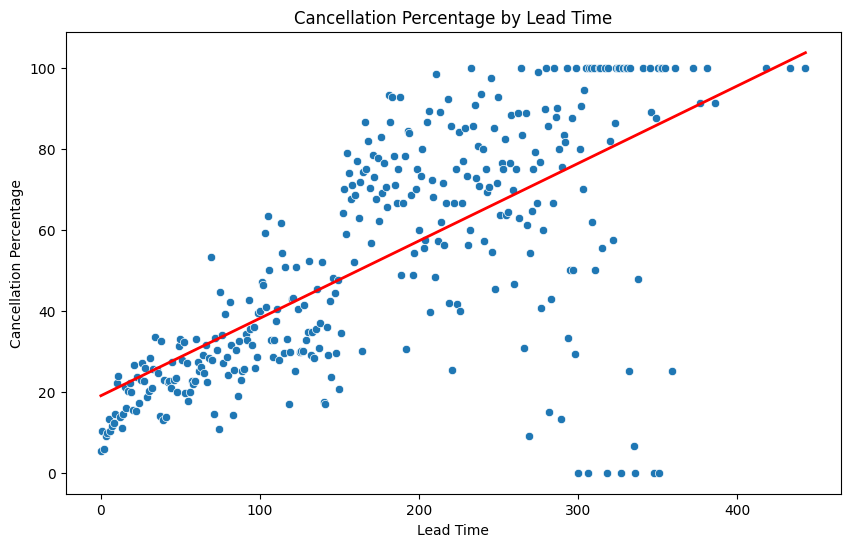

In [ ]:
# Calculate the cancellation percentage by lead time
cancellation_percentage_by_lead_time = df.groupby('lead_time')['booking_status'].apply(
    lambda x: (x == 'Canceled').sum() / len(x) * 100
).reset_index(name='Cancellation Percentage')

# Plotting the relationship between lead time and cancellation percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='Cancellation Percentage', data=cancellation_percentage_by_lead_time)

# Fit a linear regression line
sns.regplot(x='lead_time', y='Cancellation Percentage', data=cancellation_percentage_by_lead_time,
            scatter=False, ci=None, color='red', line_kws={'linewidth': 2})

plt.xlabel('Lead Time')
plt.ylabel('Cancellation Percentage')
plt.title('Cancellation Percentage by Lead Time')
plt.show()


**The above cancellation percentage vs lead time scatter plot shows that uptill lead time 200 days we can see that the cancellation rate increase as lead time increases. Also during 200 to 300 most of the data points are above the line tells that cancellation are more during that lead time. After 300 we can see the trends changes and we can see cancellation still higher than non cancellation.**

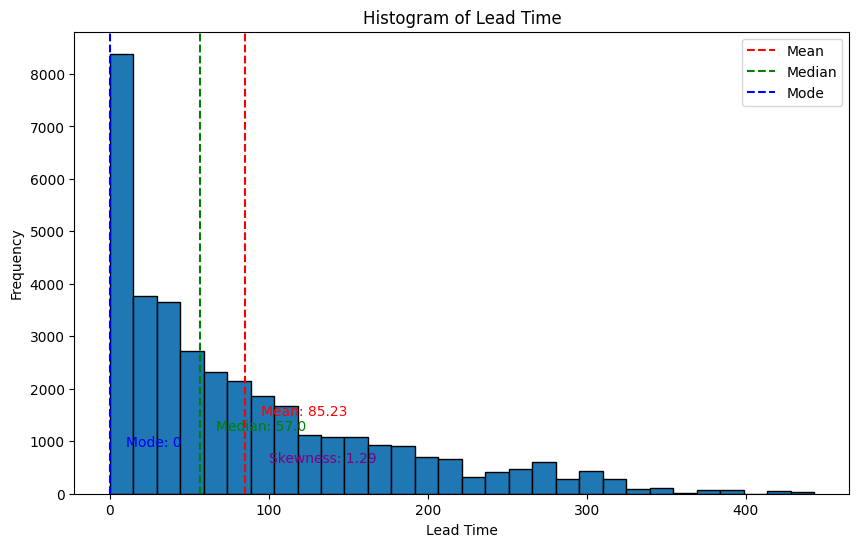

In [ ]:

# Plot histogram of lead time
plt.figure(figsize=(10, 6))
plt.hist(df['lead_time'], bins=30, edgecolor='black')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.title('Histogram of Lead Time')

# Calculate mean, median, mode, and skewness
lead_time_mean = np.mean(df['lead_time'])
lead_time_median = np.median(df['lead_time'])
lead_time_mode = df['lead_time'].mode().values[0]
lead_time_skewness = skew(df['lead_time'])

# Add vertical lines and text annotations
plt.axvline(lead_time_mean, color='red', linestyle='--', label='Mean')
plt.axvline(lead_time_median, color='green', linestyle='--', label='Median')
plt.axvline(lead_time_mode, color='blue', linestyle='--', label='Mode')
plt.text(lead_time_mean + 10, 1500, f'Mean: {lead_time_mean:.2f}', color='red')
plt.text(lead_time_median + 10, 1200, f'Median: {lead_time_median}', color='green')
plt.text(lead_time_mode + 10, 900, f'Mode: {lead_time_mode}', color='blue')
plt.text(100, 600, f'Skewness: {lead_time_skewness:.2f}', color='purple')

plt.legend()
plt.show()


## Lead time is showing that it is skewed to the right and that there are many outliers.
## SOME OF THE CONCLUSIONS :


1.   Mode 0 suggest that signifanct number of guest make last minute hotel booking
2.   Mean lead time of 85.23 days means on an average guest book their stays around 3 months in advance.

3. Postive skewness of 1.29 tells that the lead tume distribution is skewed towards longer lead times. This suggests that a portion of guests tends to make bookings well in advance



##**Checking the Histogram for the lead time of cancelled bookings only**

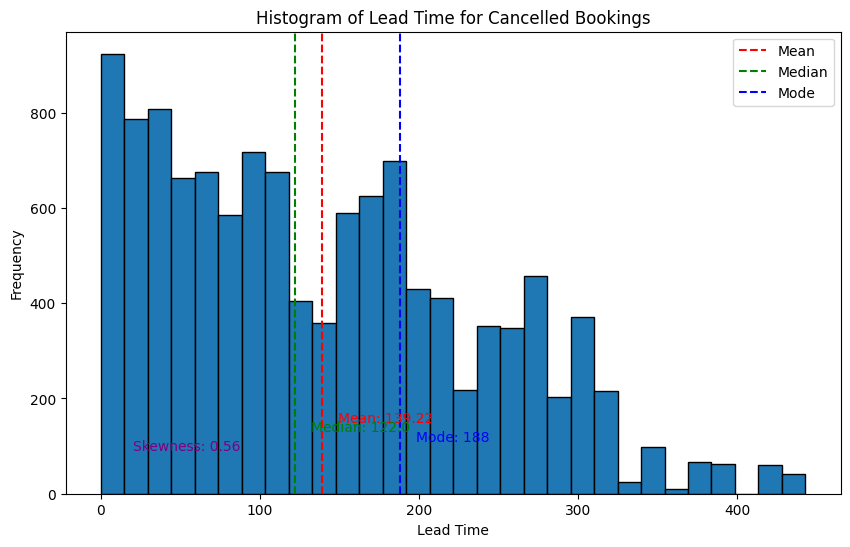

In [ ]:
# Filter the dataset to include only cancelled bookings
cancelled_bookings = df[df['booking_status'] == 'Canceled']

# Plot histogram of lead time for cancelled bookings
plt.figure(figsize=(10, 6))
plt.hist(cancelled_bookings['lead_time'], bins=30, edgecolor='black')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.title('Histogram of Lead Time for Cancelled Bookings')

# Calculate mean, median, mode, and skewness
lead_time_mean = np.mean(cancelled_bookings['lead_time'])
lead_time_median = np.median(cancelled_bookings['lead_time'])
lead_time_mode = cancelled_bookings['lead_time'].mode().values[0]
lead_time_skewness = skew(cancelled_bookings['lead_time'])

# Add vertical lines and text annotations
plt.axvline(lead_time_mean, color='red', linestyle='--', label='Mean')
plt.axvline(lead_time_median, color='green', linestyle='--', label='Median')
plt.axvline(lead_time_mode, color='blue', linestyle='--', label='Mode')
plt.text(lead_time_mean + 10, 150, f'Mean: {lead_time_mean:.2f}', color='red')
plt.text(lead_time_median + 10, 130, f'Median: {lead_time_median}', color='green')
plt.text(lead_time_mode + 10, 110, f'Mode: {lead_time_mode}', color='blue')
plt.text(20, 90, f'Skewness: {lead_time_skewness:.2f}', color='purple')

plt.legend()
plt.show()


##Key Insights from histogram of  lead time of cancelled bookings are:


**1.   The mean lead time of 139.22 days indicates that guests who eventually cancels the booking tends to make reservations approx 139 days prior to schedule arrival date**

**2.  the median lead time of 122 days suggest us that 50% of the cancelled booking have a lead times of 122 days**

**3. Mode is 188 days suggest us that significant cancelled bookings may have a lead time of approx 188 days**


##**Cancellation rate by Lead time buckets**

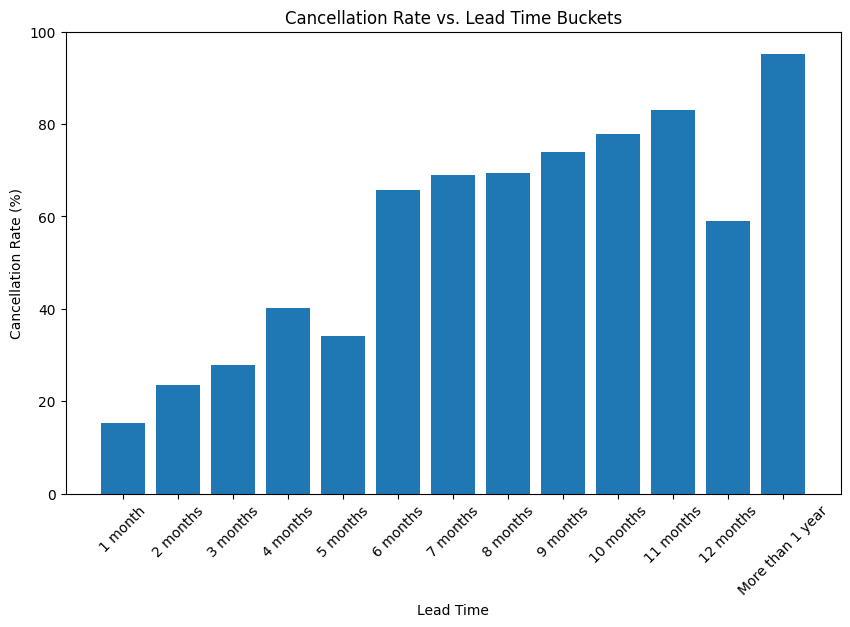

In [ ]:


# Define the lead time buckets
lead_time_buckets = ['1 month', '2 months', '3 months', '4 months', '5 months', '6 months', '7 months', '8 months', '9 months', '10 months', '11 months', '12 months', 'More than 1 year']

# Calculate the cancellation rate for each lead time bucket
cancellation_rates = []
for i in range(len(lead_time_buckets)):
    if i == len(lead_time_buckets) - 1:
        lead_time_bucket = df[df['lead_time'] > 365]
    else:
        lead_time_bucket = df[(df['lead_time'] > i*30) & (df['lead_time'] <= (i+1)*30)]

    cancellation_rate = lead_time_bucket[lead_time_bucket['booking_status'] == 'Canceled'].shape[0] / lead_time_bucket.shape[0] * 100
    cancellation_rates.append(cancellation_rate)

# Plot the cancellation rate vs. lead time
plt.figure(figsize=(10, 6))
plt.bar(lead_time_buckets, cancellation_rates)
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate (%)')
plt.title('Cancellation Rate vs. Lead Time Buckets')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()




**The cancellation Rate increases over the lead time in months**

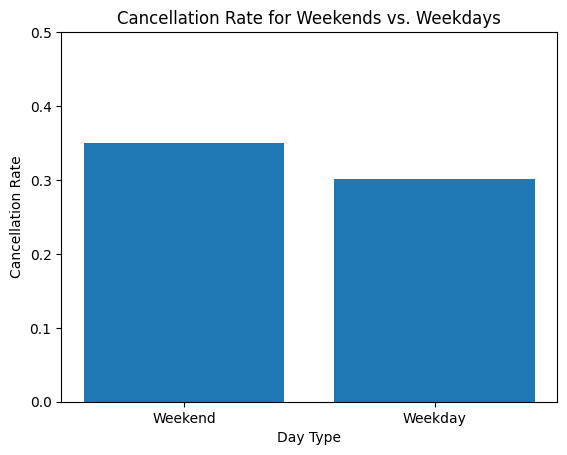

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'no_of_weekend_nights', 'no_of_week_nights', and 'cancellation'

# Calculate cancellation rate for weekends
weekend_cancellation_rate = df.loc[df['no_of_weekend_nights'] > 0, 'y'].mean()

# Calculate cancellation rate for weekdays
weekday_cancellation_rate = df.loc[df['no_of_weekend_nights'] == 0, 'y'].mean()

# Create a bar plot
plt.bar(['Weekend', 'Weekday'], [weekend_cancellation_rate, weekday_cancellation_rate])
plt.xlabel('Day Type')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate for Weekends vs. Weekdays')
plt.ylim(0, 0.5)  # Set the y-axis limits to ensure cancellation rate is displayed properly
plt.show()




**Cancellation rate is more on weekends**

##**Cancellation rate for Repeated vs Non-Repeated Guests**

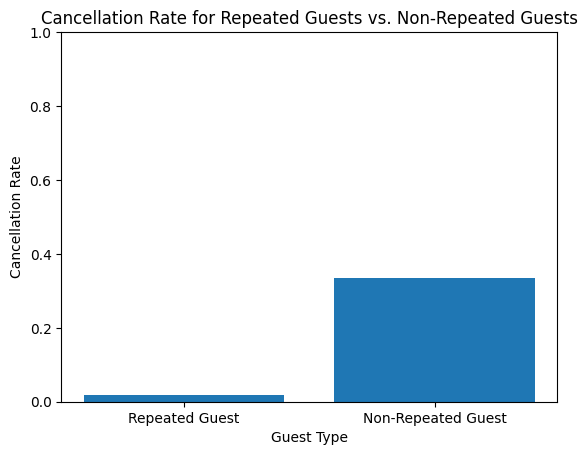

In [ ]:


# Calculate cancellation rate for repeated guests
repeated_guest_cancellation_rate = df.loc[df['repeated_guest'] == 1, 'y'].mean()

# Calculate cancellation rate for non-repeated guests
non_repeated_guest_cancellation_rate = df.loc[df['repeated_guest'] == 0, 'y'].mean()

# Create a bar plot
plt.bar(['Repeated Guest', 'Non-Repeated Guest'], [repeated_guest_cancellation_rate, non_repeated_guest_cancellation_rate])
plt.xlabel('Guest Type')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate for Repeated Guests vs. Non-Repeated Guests')
plt.ylim(0, 1)  # Set the y-axis limits to ensure cancellation rate is displayed properly
plt.show()



##**The Non Repeated Guest has high cancellation rate.**

##**Data Processing for Logistic Prediction Model**

In [ ]:
#combining month, date, year to date
dff["date"] = (dff["arrival_year"].astype(str) + "-" + dff["arrival_month"].astype(str).str.zfill(2) + "-"+ dff["arrival_date"].astype(str).str.zfill(2))
dff = dff.drop(dff[dff['date'] == '2018-02-29'].index)

# Drop the individual columns if needed
dff = dff.drop(['arrival_year', 'arrival_month', 'arrival_date'], axis=1)


In [ ]:
dff.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'y', 'date'],
      dtype='object')

In [ ]:
dff = dff.drop("Booking_ID", axis=1)

In [ ]:
# converting dtype object to categories
columns_o = dff.select_dtypes(include=["object"]).columns.tolist()
for colname in columns_o:
    dff[colname] = dff[colname].astype("category")


# Iterate through the category columns, convert to a list, and print the value counts of each.
columns_c = dff.select_dtypes(include=["category"]).columns.tolist()

X = dff.drop(["y", "date"], axis="columns")
y = dff["y"]

#Chnaging categorical to numeric using dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36238 non-null  int64  
 1   no_of_children                        36238 non-null  int64  
 2   no_of_weekend_nights                  36238 non-null  int64  
 3   no_of_week_nights                     36238 non-null  int64  
 4   required_car_parking_space            36238 non-null  int64  
 5   lead_time                             36238 non-null  int64  
 6   repeated_guest                        36238 non-null  int64  
 7   no_of_previous_cancellations          36238 non-null  int64  
 8   no_of_previous_bookings_not_canceled  36238 non-null  int64  
 9   avg_price_per_room                    36238 non-null  float64
 10  no_of_special_requests                36238 non-null  int64  
 11  type_of_meal_pl

In [ ]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'booking_status_Not_Canceled', 'lead_time_bin_(30, 60]',
       'lead_time_bin_(60, 90]', 'lead_time_bin_(90, 120]',
       'lead_time_bin_(120, 150]', 'lead_time_bin_(150, 180]',
       'lead_time_bin_(180, 210]', 'lead_

In [ ]:
dff.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'y', 'lead_time_bin',
       'date'],
      dtype='object')

In [ ]:
XX=X[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       ]]

In [ ]:
XX

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,0,0,0,65.00,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,0,0,0,106.68,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,0,0,0,60.00,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,0,0,0,100.00,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,0,0,0,94.50,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,0,0,0,167.80,...,0,0,1,0,0,0,0,0,0,1
36271,2,0,1,3,0,228,0,0,0,90.95,...,0,0,0,0,0,0,0,0,0,1
36272,2,0,2,6,0,148,0,0,0,98.39,...,0,0,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,63,0,0,0,94.50,...,0,0,0,0,0,0,0,0,0,1


##**Spliting the data in train and test in ratio of 0.70:030**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.3, random_state=1,stratify=y)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25366
Number of rows in test data = 10872


##**Normalizing the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(X_train)
xtest = sc.transform(X_test)

##**Training the Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,C=0.03359818286283781)
classifier.fit(xtrain, y_train)

LogisticRegression(C=0.03359818286283781, random_state=0)

##**Predicting using the trained model**

In [ ]:
y_pred = classifier.predict(xtest)

##**Confusion Matrix Plot**

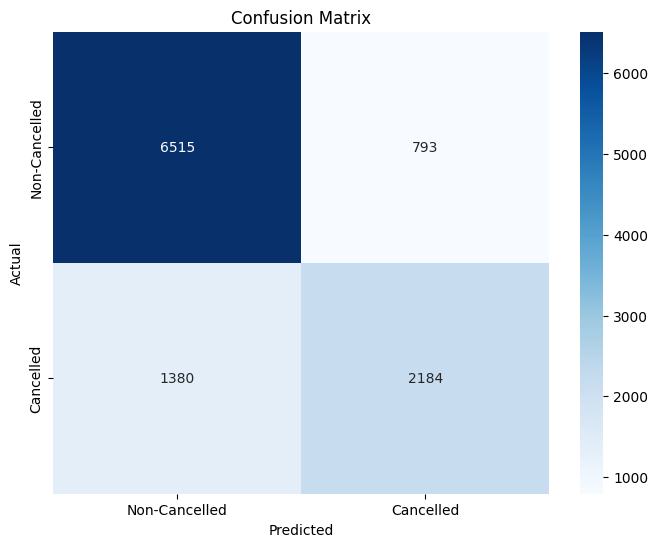

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Non-Cancelled', 'Cancelled']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##**Evaluting the model using Accuracy score, Precision,F1 , Recall**

In [ ]:

from sklearn.metrics import accuracy_score,classification_report
print("Accuracy is",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy is 0.8001287711552613
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7308
           1       0.73      0.61      0.67      3564

    accuracy                           0.80     10872
   macro avg       0.78      0.75      0.76     10872
weighted avg       0.80      0.80      0.80     10872



##**Accuracy of model is 80.01%**


##**Checking the coefficients of all the features**

In [ ]:
log_odds = classifier.coef_[0]
pd.DataFrame(log_odds,
             XX.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
lead_time,1.327781
avg_price_per_room,0.638971
market_segment_type_Online,0.158237
no_of_weekend_nights,0.128030
type_of_meal_plan_Not Selected,0.101179
no_of_previous_cancellations,0.070451
no_of_children,0.066344
no_of_week_nights,0.062963
type_of_meal_plan_Meal Plan 3,0.042945
type_of_meal_plan_Meal Plan 2,0.016446


##**A positive coefficient (e.g., lead_time: 1.327781, avg_price_per_room: 0.638971) indicates a positive relationship between the feature lead time , avg price per room vs cancellations. As lead time increases the cancellation also increase. This is in accordance with the results we have obtained above previously.**
##**A negative coefficient (e.g., repeated_guest: -0.315893) indicates a negative relationship between the feature and the cancellation. As the value of the repeated guest increases, the cancellation is expected to decrease.**


##**Recommendations**


**1. In Market Segment , the online market constitue around 64% , out of which 37% gets cancelled, hence we need to have flexibilty in cancellation policy so as to encourage customers to choose to shift the booking instead of cancelling**

**2. Cancellation rate increases with lead time, Hence we can engage the customer by provinding information on nearby events/concerts/Cultural events**


**3. Since number of customers are more likely to cancel who are visting on weekends , we can provide leisure services to enahnce their experience and provide discounts on their favourite cusines**

**4. Reward the repeated guests with loyalty programs or exclusive benefits. Create a loyaly club membership card and make them a member. Building strong relationships with repeated guests can foster loyalty and reduce the likelihood of cancellations**




